In [11]:
#Loading all the necessary libraries:
import requests
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

api_key = 'b65490dcab9b07a0033f39d80409e568'

# List of ETF chosen
symbols = ['NVDX', 'EZU', 'ITA', 'IYT']

# Getting stock data from API
def get_stock_data(symbol):
    url = f'https://financialmodelingprep.com/api/v3/historical-price-full/{symbol}?serietype=line&apikey={api_key}'
    response = requests.get(url)
    
    if response.status_code == 200:
        data = response.json()
        # Extracting historical data
        if 'historical' in data:
            return {symbol: data['historical']}
        else:
            print(f"No data found for {symbol}")
            return {symbol: []}
    else:
        print(f"Failed to retrieve data for {symbol}")
        return {symbol: []}

# Retrieving data for all ETF and save to individual JSON files
for symbol in symbols:
    stock_data = get_stock_data(symbol)
    
    # Saving each symbol's data to a separate JSON file
    with open(f'{symbol}_stock_data.json', 'w') as json_file:
        json.dump(stock_data, json_file, indent=4)
    print(f"Data for {symbol} saved to {symbol}_stock_data.json")

# Merging to a single dataframe
all_data = []

for symbol in symbols:
    with open(f'{symbol}_stock_data.json', 'r') as json_file:
        data = json.loads(json_file.read())
        historical_data = data.get(symbol, [])
        
        for entry in historical_data:
            entry['symbol'] = symbol
        
        all_data.extend(historical_data)

df = pd.DataFrame(all_data)

# Saving the merged data to a CSV file
df.to_csv('merged_stock_data.csv', index=False)
print("Merged data saved to 'merged_stock_data.csv'")


Data for NVDX saved to NVDX_stock_data.json
Data for EZU saved to EZU_stock_data.json
Data for ITA saved to ITA_stock_data.json
Data for IYT saved to IYT_stock_data.json
Merged data saved to 'merged_stock_data.csv'


In [12]:
df.describe()

,close
count,16508.000000
mean,44.752935
std,26.517893
min,2.270000
25%,27.730000
50%,37.500000
75%,52.070000
max,157.310000


In [13]:
df.tail()

,date,close,symbol
16503,2003-10-16,12.90,IYT
16504,2003-10-15,12.86,IYT
16505,2003-10-14,12.96,IYT
16506,2003-10-13,12.89,IYT
16507,2003-10-10,12.70,IYT


In [14]:
#Accessing data for a specific ETF
df[df['symbol'] == 'ITA']

,date,close,symbol
6458,2025-01-10,144.96,ITA
6459,2025-01-08,146.00,ITA
6460,2025-01-07,144.84,ITA
6461,2025-01-06,144.97,ITA
6462,2025-01-03,146.20,ITA
...,...,...,...
11155,2006-05-11,25.70,ITA
11156,2006-05-10,25.99,ITA
11157,2006-05-09,25.87,ITA
11158,2006-05-08,25.89,ITA


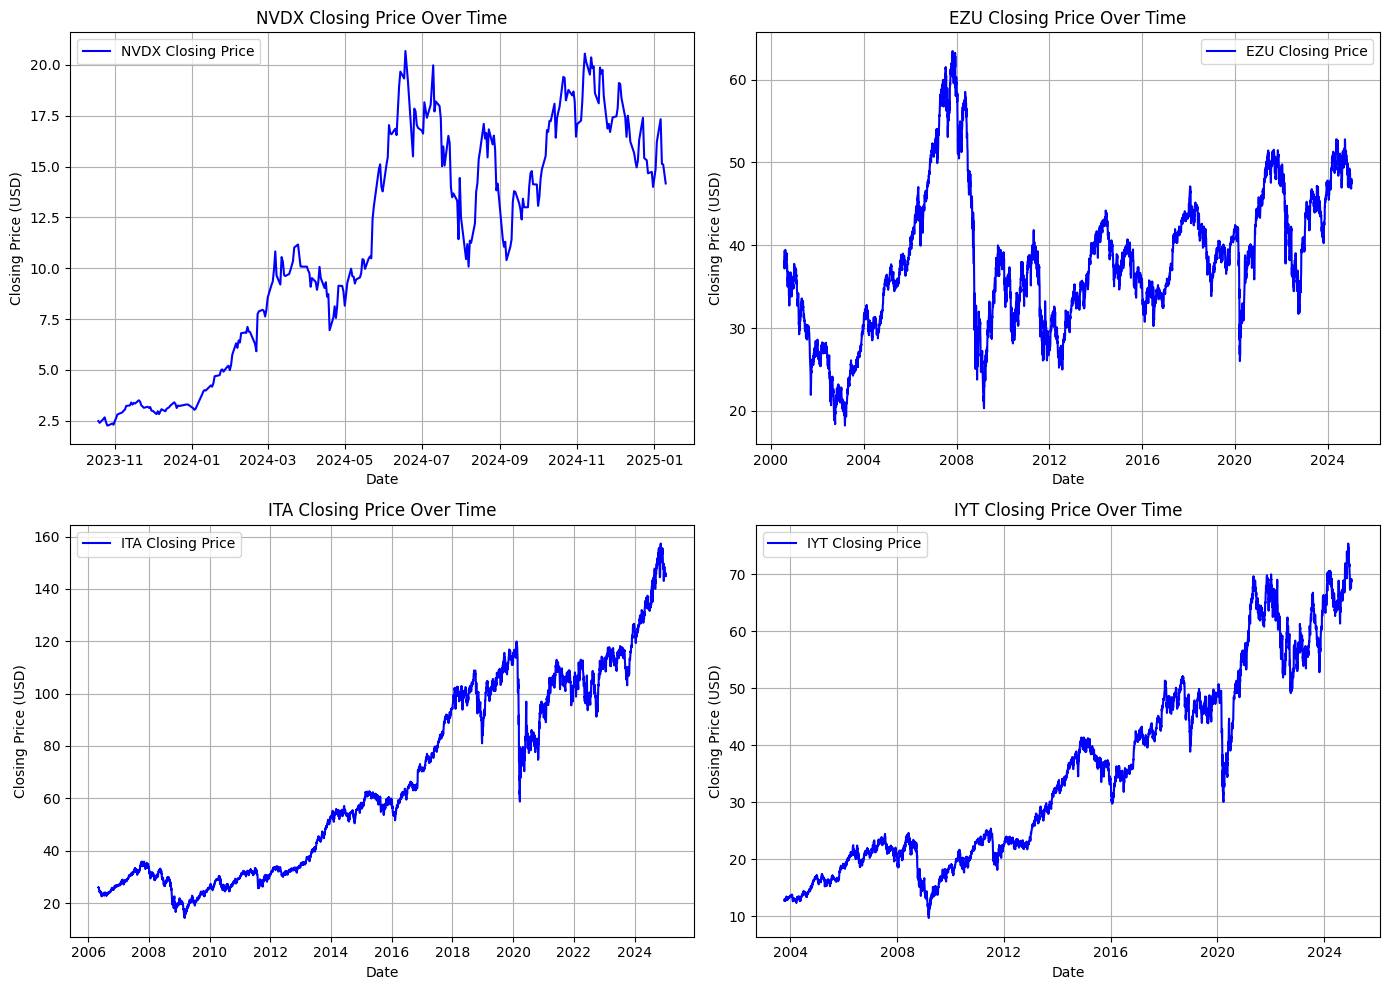

In [15]:
#Closing prices time series:
df['date'] = pd.to_datetime(df['date'])

# List of unique symbols 
symbols = df['symbol'].unique()

# Creating a figure with 4 subplots 
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plotting closing prices for each symbol
for i, symbol in enumerate(symbols):
    ax = axes[i // 2, i % 2]  
    symbol_data = df[df['symbol'] == symbol]  
    ax.plot(symbol_data['date'], symbol_data['close'], label=f'{symbol} Closing Price', color='blue')
    
    ax.set_title(f'{symbol} Closing Price Over Time')
    ax.set_xlabel('Date')
    ax.set_ylabel('Closing Price (USD)')
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()


/var/folders/t8/zlgx07xx3m14kxtv1vv3m6lw0000gn/T/ipykernel_5927/625449801.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  symbol_data['daily_return'] = symbol_data['close'].pct_change()
/var/folders/t8/zlgx07xx3m14kxtv1vv3m6lw0000gn/T/ipykernel_5927/625449801.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  symbol_data['rolling_volatility'] = symbol_data['daily_return'].rolling(rolling_window).std()


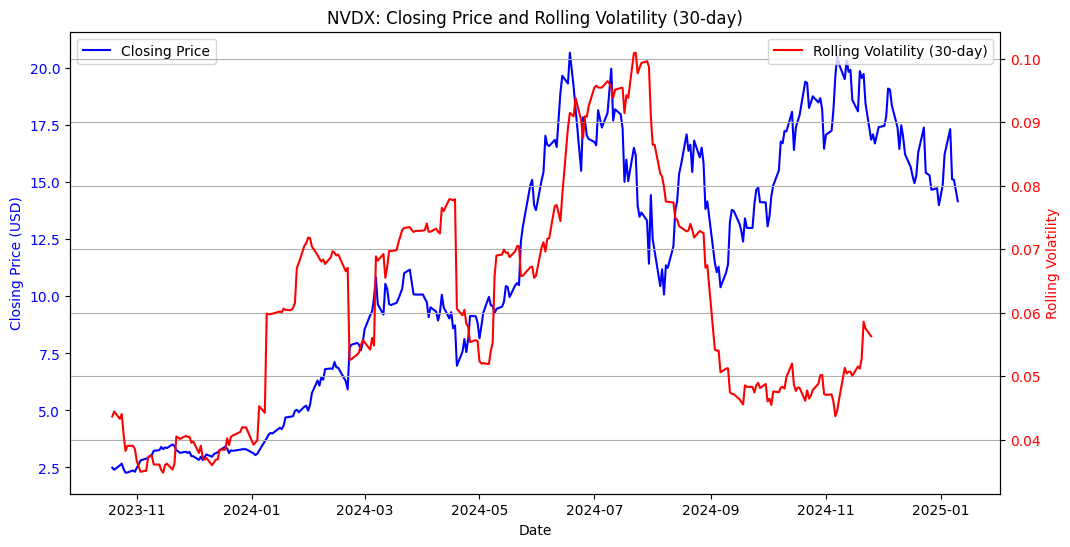

/var/folders/t8/zlgx07xx3m14kxtv1vv3m6lw0000gn/T/ipykernel_5927/625449801.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  symbol_data['daily_return'] = symbol_data['close'].pct_change()
/var/folders/t8/zlgx07xx3m14kxtv1vv3m6lw0000gn/T/ipykernel_5927/625449801.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  symbol_data['rolling_volatility'] = symbol_data['daily_return'].rolling(rolling_window).std()


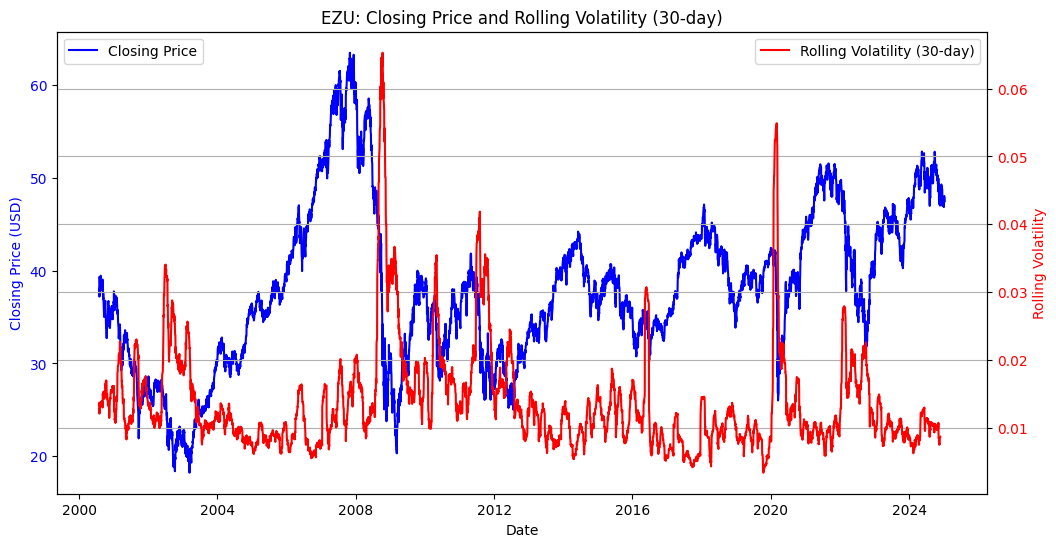

/var/folders/t8/zlgx07xx3m14kxtv1vv3m6lw0000gn/T/ipykernel_5927/625449801.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  symbol_data['daily_return'] = symbol_data['close'].pct_change()
/var/folders/t8/zlgx07xx3m14kxtv1vv3m6lw0000gn/T/ipykernel_5927/625449801.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  symbol_data['rolling_volatility'] = symbol_data['daily_return'].rolling(rolling_window).std()


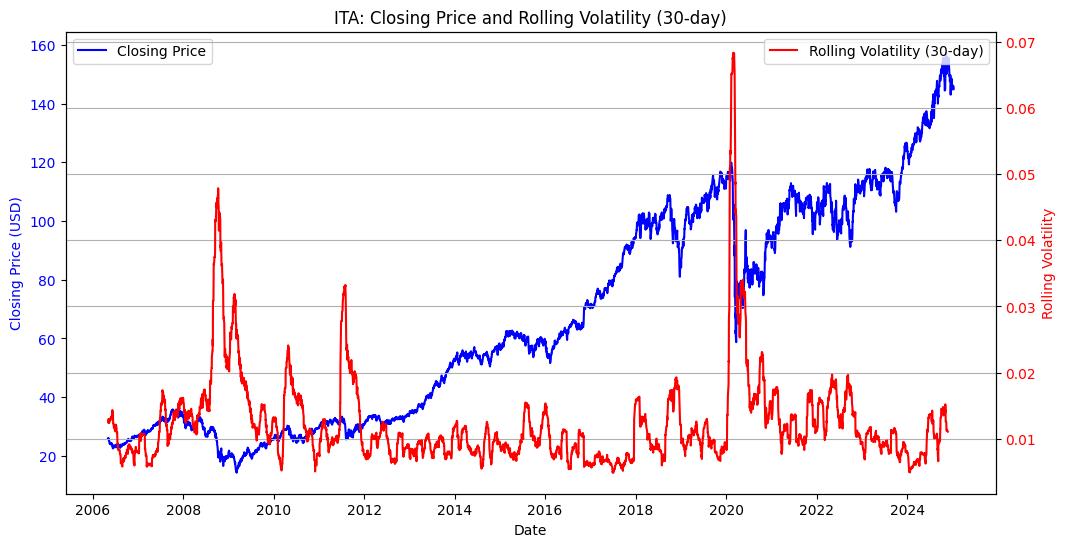

/var/folders/t8/zlgx07xx3m14kxtv1vv3m6lw0000gn/T/ipykernel_5927/625449801.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  symbol_data['daily_return'] = symbol_data['close'].pct_change()
/var/folders/t8/zlgx07xx3m14kxtv1vv3m6lw0000gn/T/ipykernel_5927/625449801.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  symbol_data['rolling_volatility'] = symbol_data['daily_return'].rolling(rolling_window).std()


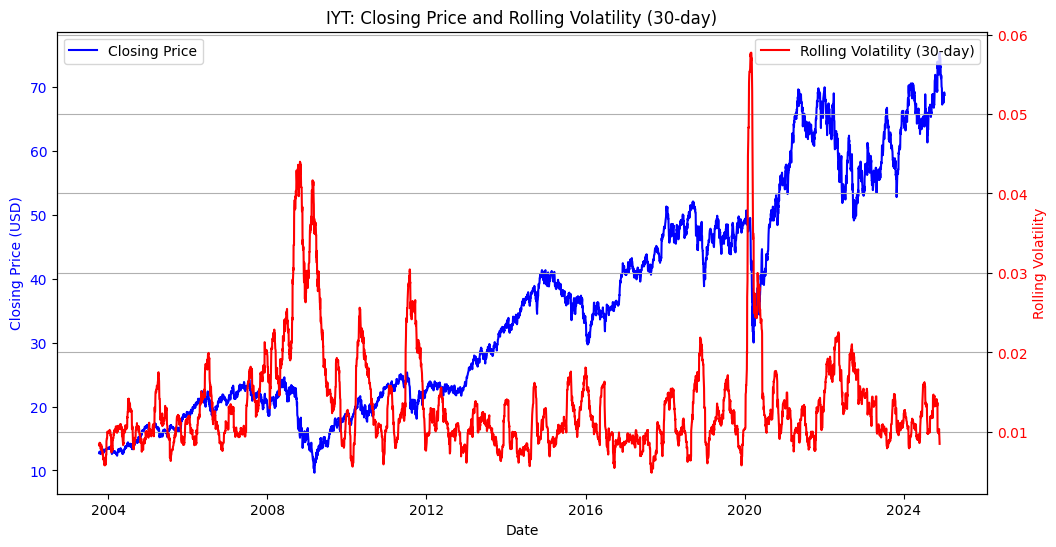

In [16]:
#Rolling Standard Deviation -> Volatilty analysis:
# Setting 'date' as the index 
df.set_index('date', inplace=True)

# rolling window size in days
rolling_window = 30

# Performing analysis for each symbol
symbols = df['symbol'].unique()
for symbol in symbols:
    symbol_data = df[df['symbol'] == symbol]
    
    # Calculating daily returns
    symbol_data['daily_return'] = symbol_data['close'].pct_change()
    
    # Calculate rolling standard deviation (volatility)
    symbol_data['rolling_volatility'] = symbol_data['daily_return'].rolling(rolling_window).std()
    
    # Plotting closing price and rolling sd
    fig, ax1 = plt.subplots(figsize=(12, 6))
    ax1.plot(symbol_data.index, symbol_data['close'], color='blue', label='Closing Price')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Closing Price (USD)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    
    # Plotting rolling sd on a secondary y-axis
    ax2 = ax1.twinx()
    ax2.plot(symbol_data.index, symbol_data['rolling_volatility'], color='red', label='Rolling Volatility (30-day)')
    ax2.set_ylabel('Rolling Volatility', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    plt.title(f'{symbol}: Closing Price and Rolling Volatility (30-day)')
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    plt.grid()
    plt.show()


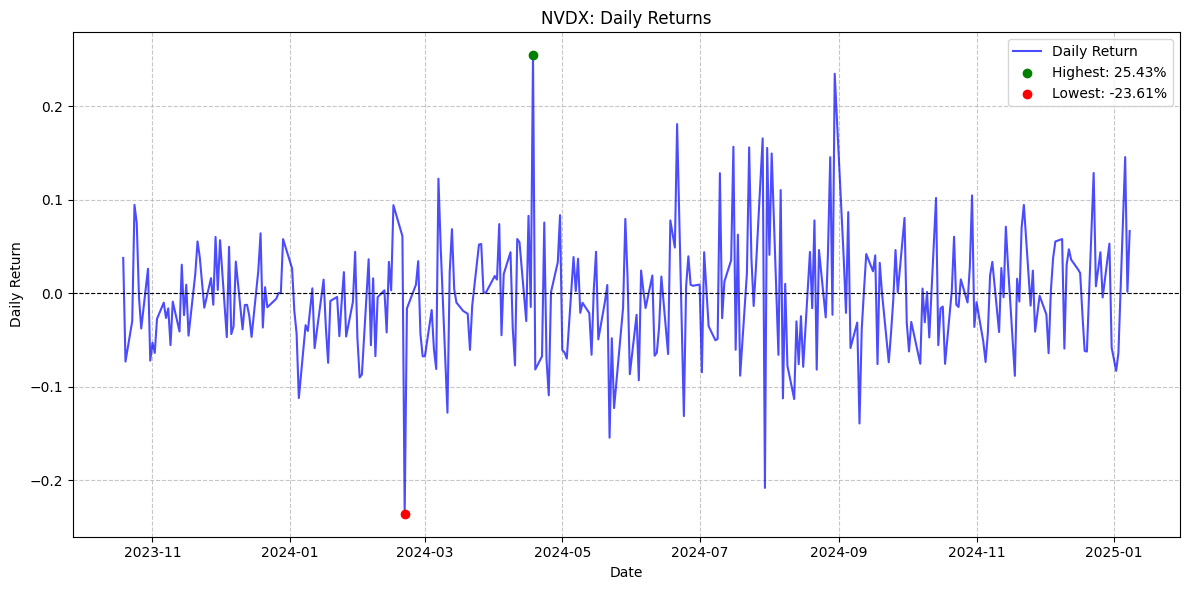

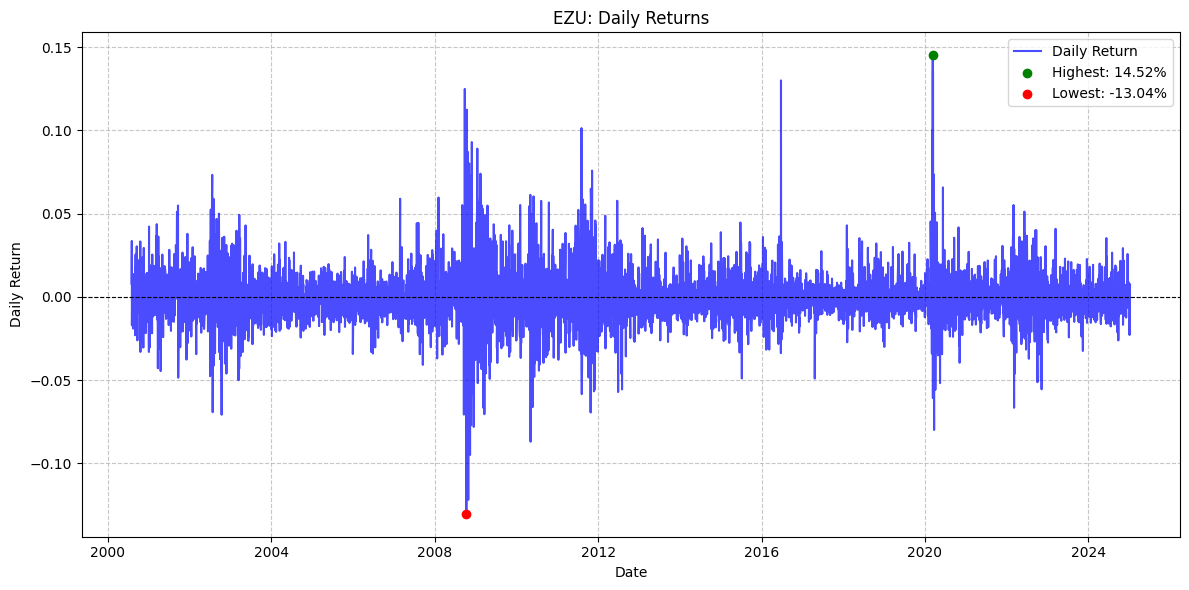

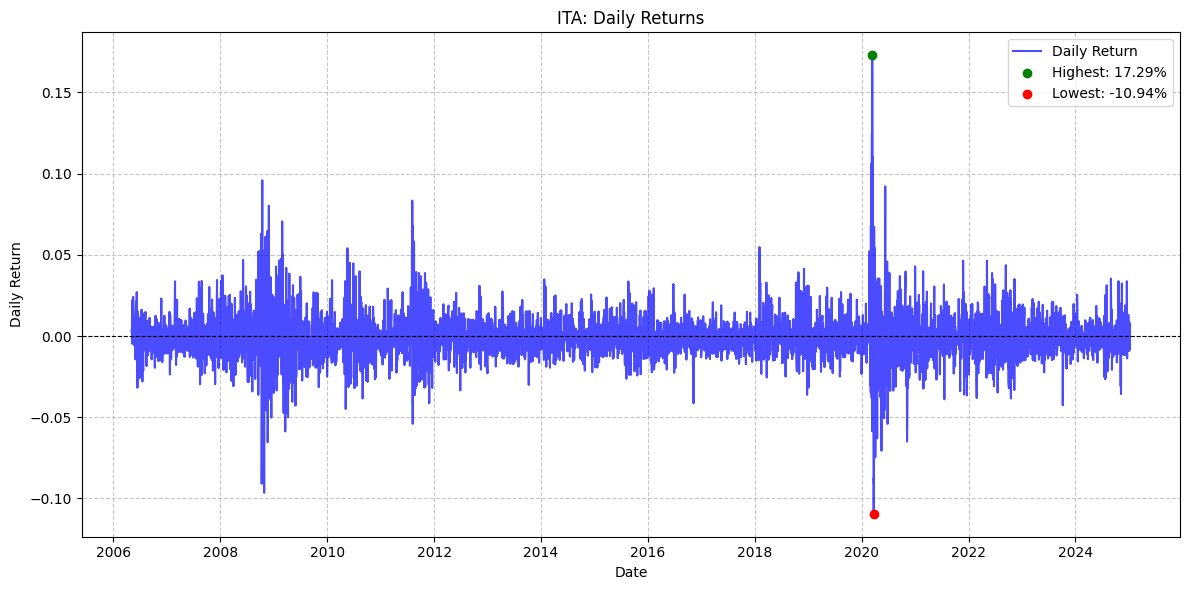

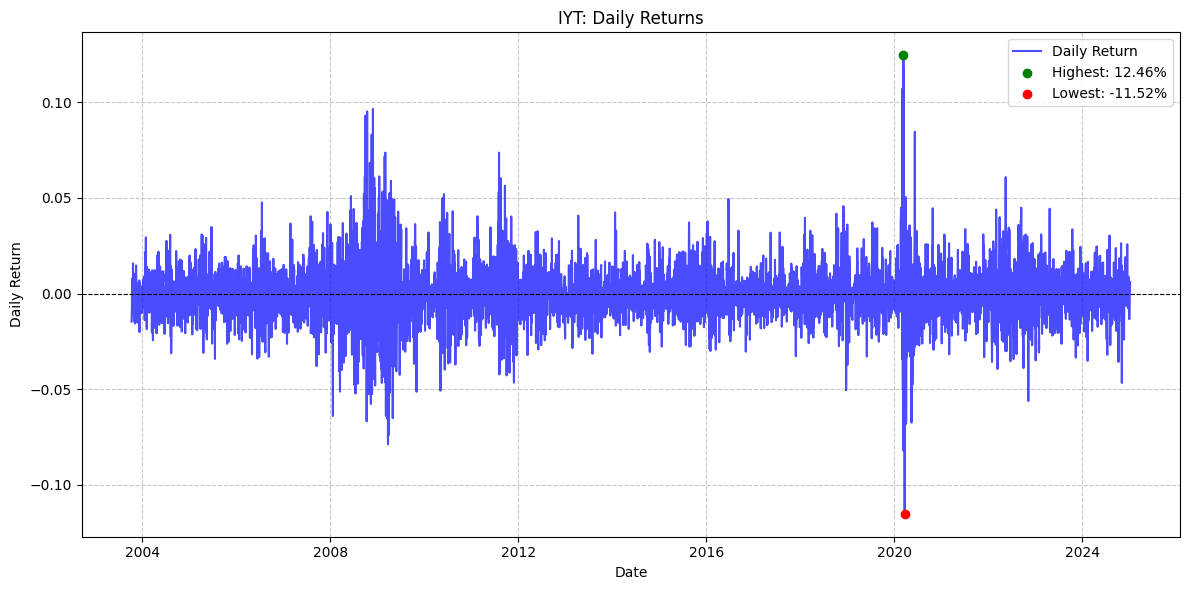

In [17]:
#Daily Returns analysis:
symbols = df['symbol'].unique()
for symbol in symbols:
    symbol_data = df[df['symbol'] == symbol].copy()
    symbol_data['daily_return'] = symbol_data['close'].pct_change()
    
    # Identifying days with highest and lowest daily returns
    max_return_date = symbol_data['daily_return'].idxmax()
    min_return_date = symbol_data['daily_return'].idxmin()
    max_return = symbol_data.loc[max_return_date, 'daily_return']
    min_return = symbol_data.loc[min_return_date, 'daily_return']
    
    # Plotting daily returns
    plt.figure(figsize=(12, 6))
    plt.plot(symbol_data.index, symbol_data['daily_return'], label='Daily Return', color='blue', alpha=0.7)
    plt.scatter(max_return_date, max_return, color='green', label=f'Highest: {max_return:.2%}', zorder=5)
    plt.scatter(min_return_date, min_return, color='red', label=f'Lowest: {min_return:.2%}', zorder=5)
    

    plt.title(f'{symbol}: Daily Returns')
    plt.xlabel('Date')
    plt.ylabel('Daily Return')
    plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
    plt.legend()
    plt.grid(visible=True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


As we have also seen in the first analysis of the rolling standard deviation, here we can confirm that NVDX is the more risky ETF, followed by EZU which presentes more instability than the other two US ETF ITA and IYT.

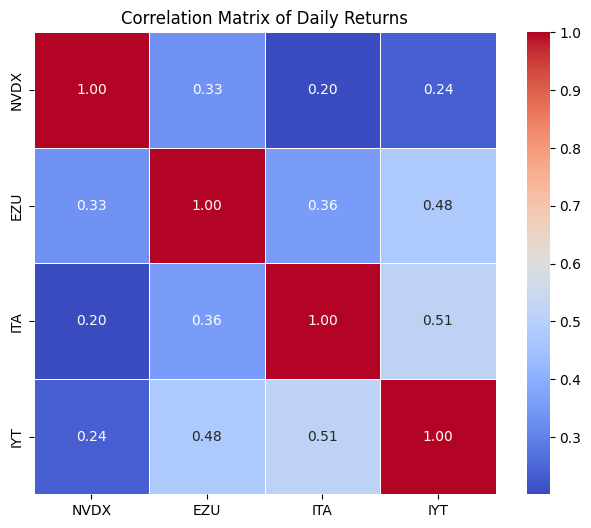

In [18]:
#Correlation analysis:
# Creating a new DataFrame for daily returns
daily_returns = pd.DataFrame()

symbols = df['symbol'].unique()
for symbol in symbols:
    symbol_data = df[df['symbol'] == symbol].copy()
    symbol_data['daily_return'] = symbol_data['close'].pct_change()
    daily_returns[symbol] = symbol_data['daily_return']


daily_returns.dropna(inplace=True)

# Correlation matrix
correlation_matrix = daily_returns.corr()

# Visualizing the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix, 
    annot=True,  
    cmap='coolwarm', 
    fmt='.2f', 
    linewidths=0.5, 
    square=True  
)
plt.title('Correlation Matrix of Daily Returns')
plt.show()


As expected, the correlation matrix outlines the fact that the four ETF considered are not highly correlated with one another, even though there is a weak correlation between EZU and IYT and IYT and ITA (which is normal because they both refer to Dow Jones Us companies). The fact that EZU is more correlated with IYT than ITA, suggest the fact that European companies in the aerospace segment are not as present than in the Transportation Systems market.

NVDX: Bullish Days = 100, Bearish Days = 122


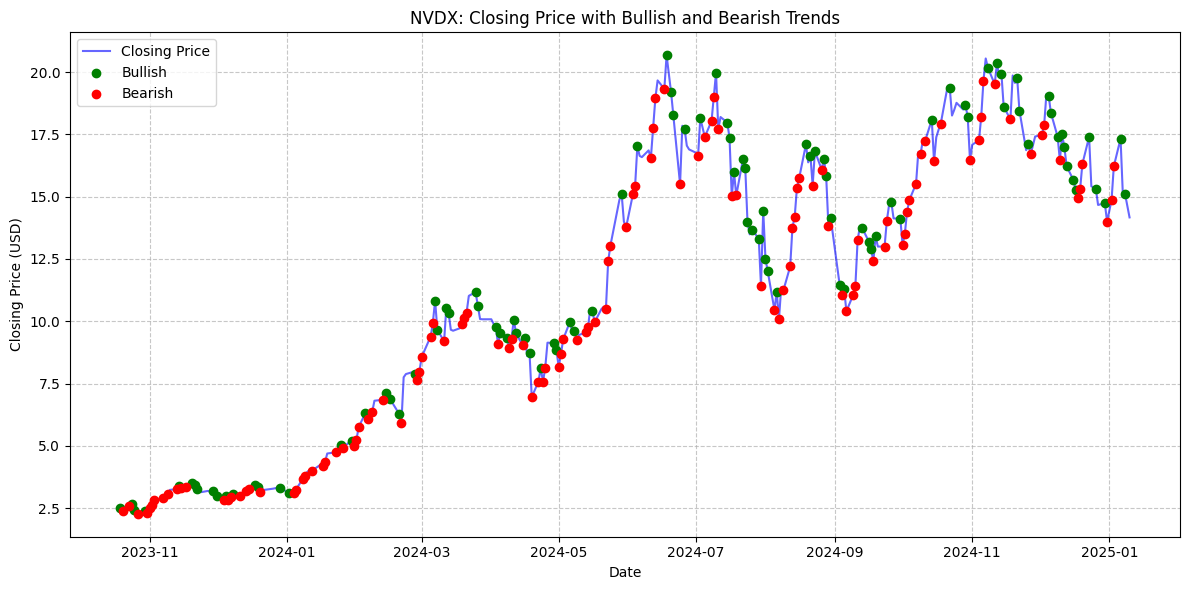

EZU: Bullish Days = 446, Bearish Days = 367


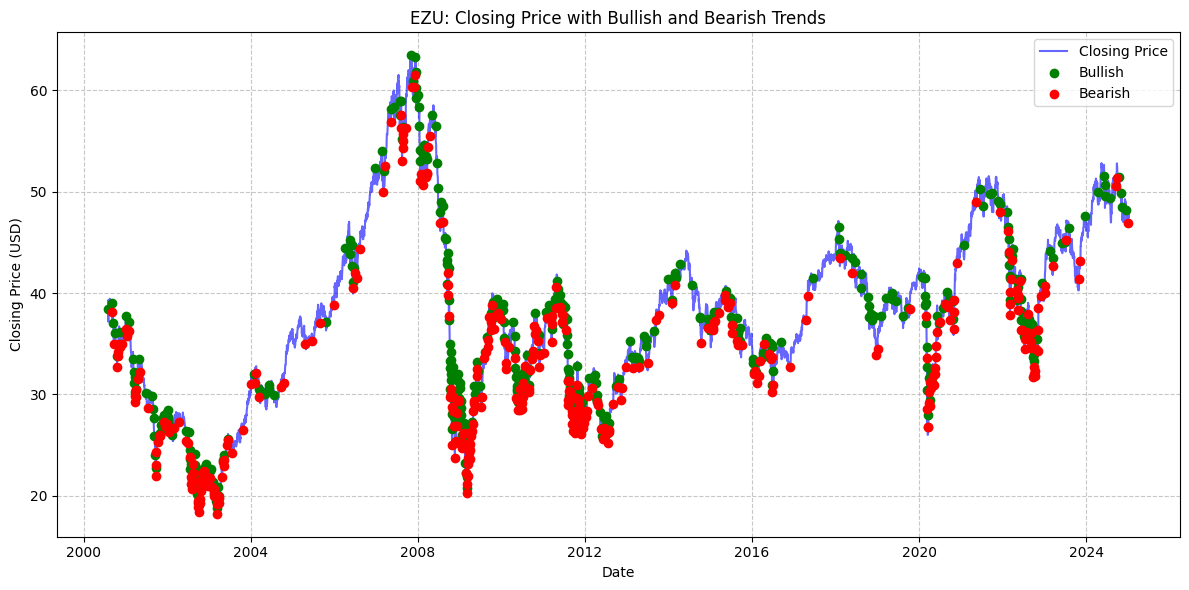

ITA: Bullish Days = 285, Bearish Days = 238


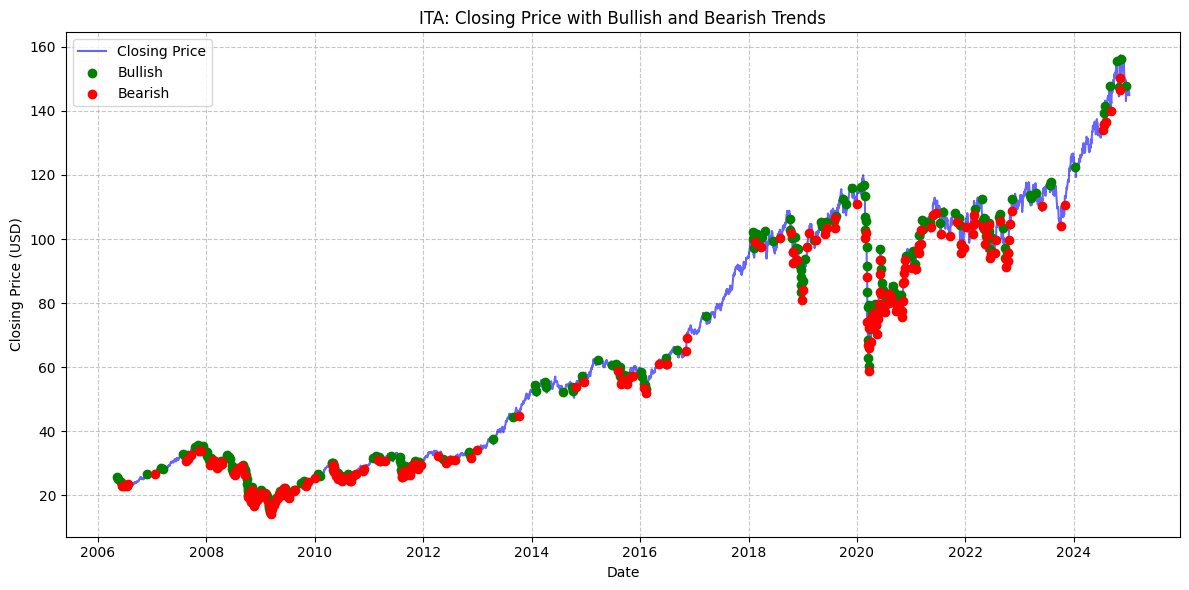

IYT: Bullish Days = 368, Bearish Days = 352


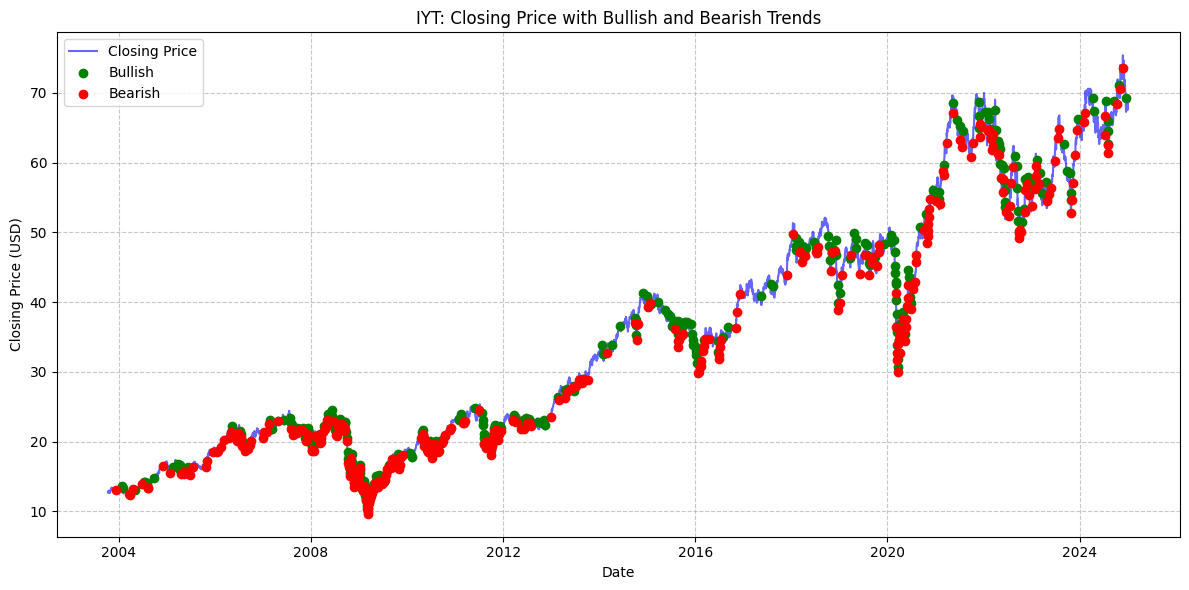

In [19]:
#Identifying trends:
# Defining thresholds for bullish and bearish days
bullish_threshold = 0.02  
bearish_threshold = -0.02 


symbols = df['symbol'].unique()
for symbol in symbols:
    symbol_data = df[df['symbol'] == symbol].copy()
    
    symbol_data['daily_return'] = symbol_data['close'].pct_change()
    
    # Classifying days as bullish or bearish
    symbol_data['trend'] = 'Neutral'  # Default classification
    symbol_data.loc[symbol_data['daily_return'] > bullish_threshold, 'trend'] = 'Bullish'
    symbol_data.loc[symbol_data['daily_return'] < bearish_threshold, 'trend'] = 'Bearish'
    
    # Counting bullish and bearish days
    bullish_count = (symbol_data['trend'] == 'Bullish').sum()
    bearish_count = (symbol_data['trend'] == 'Bearish').sum()
    print(f"{symbol}: Bullish Days = {bullish_count}, Bearish Days = {bearish_count}")
    
    # Plotting closing price with bullish and bearish trends highlighted
    plt.figure(figsize=(12, 6))
    plt.plot(symbol_data.index, symbol_data['close'], label='Closing Price', color='blue', alpha=0.6)
    
    # Highlighting bullish days
    bullish_days = symbol_data[symbol_data['trend'] == 'Bullish']
    plt.scatter(bullish_days.index, bullish_days['close'], color='green', label='Bullish', zorder=5)
    
    # Highlighting bearish days
    bearish_days = symbol_data[symbol_data['trend'] == 'Bearish']
    plt.scatter(bearish_days.index, bearish_days['close'], color='red', label='Bearish', zorder=5)
    
    plt.title(f'{symbol}: Closing Price with Bullish and Bearish Trends')
    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')
    plt.legend()
    plt.grid(visible=True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


In [20]:
# Threshold for bullish days
bullish_threshold = 0.02  

# empty list to store the results
results = []

symbols = df['symbol'].unique()
for symbol in symbols:
   
    symbol_data = df[df['symbol'] == symbol].copy()
    symbol_data['daily_return'] = symbol_data['close'].pct_change()
    
    symbol_data['trend'] = 'Neutral'
    symbol_data.loc[symbol_data['daily_return'] > bullish_threshold, 'trend'] = 'Bullish'
    
    # Calculating the percentage of bullish days
    total_days = len(symbol_data)
    bullish_days_count = (symbol_data['trend'] == 'Bullish').sum()
    bullish_percentage = (bullish_days_count / total_days) * 100
    
    #results
    results.append({'Symbol': symbol, 'Bullish Percentage': bullish_percentage})

# Create a DataFrame from the results
bullish_df = pd.DataFrame(results)
print(bullish_df)


  Symbol  Bullish Percentage
0   NVDX           32.467532
1    EZU            7.252033
2    ITA            6.061251
3    IYT            6.881077


By calculating the percentage of bullish days in a period of about 20 years for ITA, EZU and IYT, we get that just a small percentage of the days was bullish, highlighting the fact that, throughout these years, these ETF do not show consistently high daily returns, even though they still highlight a growth trend in general. ITA and IYT are strictly connected to the Dow Jones performances of companies operating, respectively, in the aerospace and in the transportation market. Looking at the previous plots, their growth trend over the years is very similar. It's also interesting to notice that the downfall in prices during the pandemic was steeper than the one occurred after the 2008 crisis.
Finally, EZU is an ETF which comprises a broad range of stocks from Eurozone companies in different markets. We can see clear downfalls in the price during recession periods such as the 2008 Crisis and 2020 pandemic and a relatively stable neutral trend as of now.

Talking about NVDX, instead, we have to consider a short period of time in which the bullish days consistenly rise up compared to the previous ETF closing prices. Considering that it's an ETF which aims to double up the daily returns of NVIDIA stock prices (but just in the short run), it's normal that the growth in the short term may be more consistent compared to other financial products, even though with the recent crisis of the semiconductors, NVIDIA stocks have experienced a negative trend especially over the past few months 

Challenges faced:
A considerable amount of time was spent on retrieving data from the rest API
and understanding the data retrieved.
another challenge was understanding practically how to interpret stock data
and the analysis techniques implemented such as the rolling standard deviation 
in order to choose an appropriate data visualization technique, mainly
exploiting Seaborn and Matplotlib functionalities.

Additional steps and further improvements:
A key additional step that I'm eager to implement for a further analysis 
is to leverage machine learning models for stock prices prediction 
and risk management analyisis
last but not least, it may be more useful to get to analyze other stocks
or ETF more correlated with one another, because it will represent a more 
complete market analysis in a specific sector or segment